In [ ]:
url="https://raw.githubusercontent.com/mac390/HOOHACKS/main/Land_Use.csv"
url1="https://raw.githubusercontent.com/valentinadiaz0808/Data-Visualization/main/FoodShareTotalEmissions.csv"

In [ ]:
import pandas as pd             #For tabular manipulation
import matplotlib.pyplot as plt #For making graphs
import seaborn as sns           #For making graphs
import plotly.express as px     #How to create, update and modify graphs

In [ ]:
df = pd.read_csv(url)
# With this code, I imported the "Land_Use" document
df.info()
# This code shows the type of information contained in the DataFrame
df.head()
# This code shows the first 5 rows of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Entity                                         43 non-null     object 
 1   Code                                           0 non-null      float64
 2   Year                                           43 non-null     int64  
 3   Land use per kilogram (Poore & Nemecek, 2018)  43 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.5+ KB


,Entity,Code,Year,"Land use per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2018,0.63
1,Bananas,NaN,2018,1.93
2,Barley,NaN,2018,1.11
3,Beef (beef herd),NaN,2018,326.21
4,Beef (dairy herd),NaN,2018,43.24


In [ ]:
columns = ['Entity', 'Year', 'Land use per kilogram (Poore & Nemecek, 2018)']
#This code changes the name of some columns
df=df[columns]
#The changes are saved on the DataFrame
df.head()
#This code prints the first 5 rows again to verify that the columns were deleated

,Entity,Year,"Land use per kilogram (Poore & Nemecek, 2018)"
0,Apples,2018,0.63
1,Bananas,2018,1.93
2,Barley,2018,1.11
3,Beef (beef herd),2018,326.21
4,Beef (dairy herd),2018,43.24


In [ ]:
df.rename(columns={'Land use per kilogram (Poore & Nemecek, 2018)': "Land use p/kg"}, inplace=True)
#This code changes the names of certain columns
df.head()
#This code prints the first 5 rows again to verify that the columns were renamed

,Entity,Year,Land use p/kg
0,Apples,2018,0.63
1,Bananas,2018,1.93
2,Barley,2018,1.11
3,Beef (beef herd),2018,326.21
4,Beef (dairy herd),2018,43.24


In [ ]:
#Determine descriptive statisatics of the data
df.describe()

,Year,Land use p/kg
count,43.0,43.000000
mean,2018.0,26.196279
std,0.0,74.166242
min,2018.0,0.330000
25%,2018.0,1.445000
50%,2018.0,3.520000
75%,2018.0,12.590000
max,2018.0,369.810000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



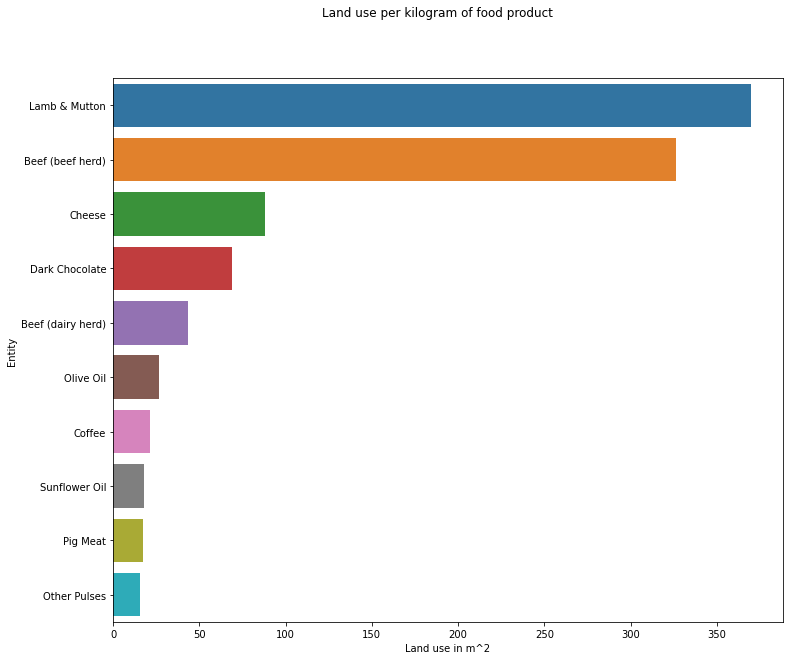

In [ ]:
top_10 = df.sort_values(by=['Land use p/kg'], ascending=False).head(10)
#This code sorts the values of the 'Land use p/kg' in descending order and shows the top 10
plt.figure(figsize=(12,10))
#This code determines the dimensions of the graph
plot = sns.barplot(top_10["Land use p/kg"], top_10["Entity"])
# This code uses seaborn to create a horizontal bar plot showing the data
plt.suptitle("Land use per kilogram of food product")
# This code shows the title on the upper part of the graph
plt.xlabel("Land use in m^2")
plt.show()

In [ ]:
epc = pd.read_csv(url1)
# With this code, I imported the "FoodShareTotalEmissions" document
columns1 = ["Entity", "Year", "Food's share of total emissions (incl. LULUFC)"]
epc=epc[columns1]
#Using the Slice technique to bring only certain columns

epc.rename(columns={"Food's share of total emissions (incl. LULUFC)": "Foods share Tot emissions"}, inplace=True)
#This code changes the names of certain columns
epc.head()

,Entity,Year,Foods share Tot emissions
0,Afghanistan,1990,78.558522
1,Afghanistan,1991,79.335651
2,Afghanistan,1992,84.268804
3,Afghanistan,1993,85.247941
4,Afghanistan,1994,86.897834


In [ ]:
epc = epc[epc.Year==2015]
#Using the Slice technique to bring only the year 2015 from the Years column
epc.head()

,Entity,Year,Foods share Tot emissions
25,Afghanistan,2015,63.615003
51,Albania,2015,60.226405
77,Algeria,2015,21.323461
103,American Samoa,2015,108.551605
129,Angola,2015,68.196908


In [ ]:
world = epc.groupby("Entity")['Year','Foods share Tot emissions'].sum().reset_index()
#Group the data with groupby
# We use reset_index () so that the previous index is added as a column
world.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Entity,Year,Foods share Tot emissions
0,Afghanistan,2015,63.615003
1,Albania,2015,60.226405
2,Algeria,2015,21.323461
3,American Samoa,2015,108.551605
4,Angola,2015,68.196908


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



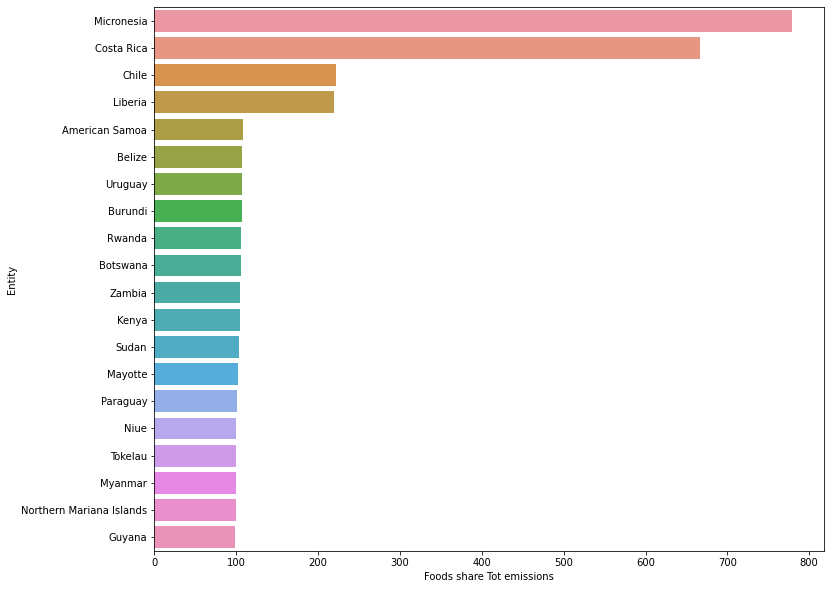

In [ ]:
top_20 = world.sort_values(by=['Foods share Tot emissions'], ascending=False).head(20)
plt.figure(figsize=(12,10))

#Now we are going to find the top 20 countries with the highest number of Foods share Total emissions
plot = sns.barplot(top_20['Foods share Tot emissions'], top_20['Entity'])
plt.show()

#To see the total number of foods share emissions in each country we can zoom in on the map and place the cursor over each country

In [ ]:
#Now we will draw a map of choroplets on a world map
figure = px.choropleth(world,locations='Entity', locationmode='country names', color='Foods share Tot emissions', hover_name='Entity', color_continuous_scale='tealgrn', range_color=[0,120],title='Share of total greenhouse gas emissions that come from food 2015')
figure.show()
#By z

In [ ]:
prot="https://raw.githubusercontent.com/ricardoescandonn/protein/main/ghg-per-protein-poore.csv"
datapr = pd.read_csv(prot)
# With this code, I imported Entity, Year, "Emisiones de GEI por 100 g de proteína (Poore & Nemecek, 2018)" from the document prot
columns2 = ['Entity','Year',
       'GHG emissions per 100g protein (Poore & Nemecek, 2018)']
datapr=datapr[columns2]
#Using the Slice technique to bring only certain columns

datapr.rename(columns={'GHG emissions per 100g protein (Poore & Nemecek, 2018)': "GHG Emissions 100g protein"}, inplace=True)
#This code changes the names of certain columns
datapr.head()


,Entity,Year,GHG Emissions 100g protein
0,Apples,2010,14.333333
1,Bananas,2010,9.555556
2,Beef (beef herd),2010,49.889669
3,Beef (dairy herd),2010,16.869301
4,Berries & Grapes,2010,15.300000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



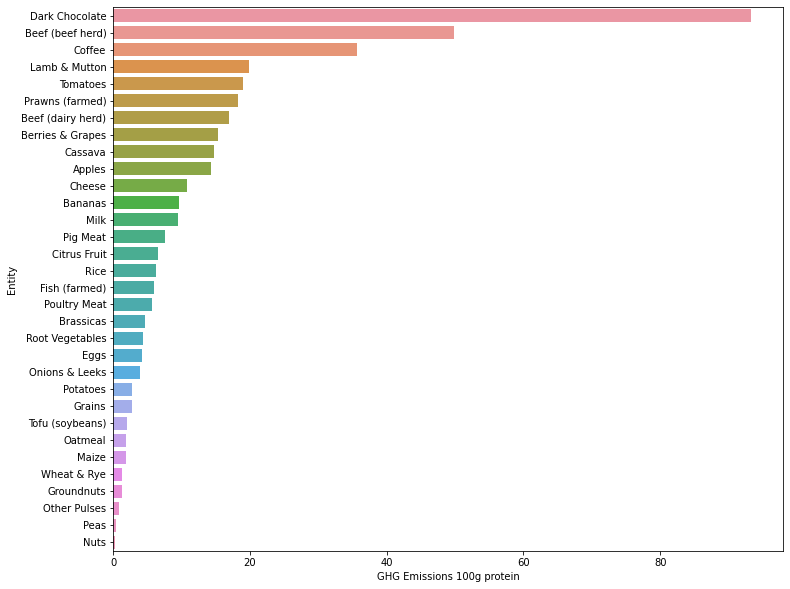

In [ ]:
datapr = datapr.sort_values(by=['GHG Emissions 100g protein'], ascending=False)
#This code sorts the values of the 'GHG Emissions 100g protein' in descending order and shows the products
plt.figure(figsize=(12,10))
#This code determines the dimensions of the graph
plot = sns.barplot(x= datapr['GHG Emissions 100g protein'], y= datapr["Entity"])
# This code uses seaborn to create a horizontal bar plot showing the data

plt.show()

https://ourworldindata.org/grapher/ghg-per-protein-poore

https://ourworldindata.org/grapher/food-share-total-emissions